In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
bank_df = pd.read_csv( 'bank.csv')
bank_df.head(5)

age          job  marital  education default  balance housing-loan  \
0   30   unemployed  married    primary      no     1787           no   
1   33     services  married  secondary      no     4789          yes   
2   35   management   single   tertiary      no     1350          yes   
3   30   management  married   tertiary      no     1476          yes   
4   59  blue-collar  married  secondary      no        0          yes   

  personal-loan  current-campaign  previous-campaign subscribed  
0            no                 1                  0         no  
1           yes                 1                  4         no  
2            no                 1                  1         no  
3           yes                 4                  0         no  
4            no                 1                  0         no

In [44]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [45]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [46]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample

In [47]:
# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

In [48]:
##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes,replace=True, n_samples=2000) #2000

In [49]:
# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [50]:
len(new_bank_df)

6000

In [51]:
new_bank_df.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [52]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [53]:
print(new_bank_df)

      age           job   marital  education default  balance housing-loan  \
2465   44    unemployed    single    primary      no     4232           no   
759    42  entrepreneur   married   tertiary      no      233           no   
1952   41        admin.  divorced  secondary      no     6046          yes   
668    55       retired  divorced  secondary      no      138           no   
377    37    management   married   tertiary      no      393          yes   
...   ...           ...       ...        ...     ...      ...          ...   
1208   28    management   married   tertiary      no     3694           no   
1458   36    management   married   tertiary      no     2987          yes   
4210   51   blue-collar  divorced  secondary      no       78          yes   
2678   74       retired   married  secondary      no      935           no   
2864   55   blue-collar   married    primary      no     1649          yes   

     personal-loan  current-campaign  previous-campaign subscri

In [54]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )

In [55]:
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [56]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [57]:
X

age  balance  current-campaign  previous-campaign  job_blue-collar  \
2465   44     4232                 1                  0                0   
759    42      233                 1                  0                0   
1952   41     6046                 6                  2                0   
668    55      138                 1                  0                0   
377    37      393                 3                  4                0   
...   ...      ...               ...                ...              ...   
1208   28     3694                 2                  0                0   
1458   36     2987                 1                  0                0   
4210   51       78                 2                  0                1   
2678   74      935                 1                  1                0   
2864   55     1649                 3                  0                1   

      job_entrepreneur  job_housemaid  job_management  job_retired  \
2465                 0              0               0            0   
759                  1              0               0            0   
1952                 0              0               0            0   
668                  0              0               0            1   
377                  0              0               1            0   
...                ...            ...             ...          ...   
1208                 0              0               1            0   
1458                 0              0               1            0   
4210                 0              0               0            0   
2678                 0              0               0            1   
2864                 0              0               0            0   

      job_self-employed  ...  job_unemployed  job_unknown  marital_married  \
2465                  0  ...               1            0                0   
759                   0  ...               0            0                1   
1952                  0  ...               0            0                0   
668                   0  ...               0            0                0   
377                   0  ...               0            0                1   
...                 ...  ...             ...          ...              ...   
1208                  0  ...               0            0                1   
1458                  0  ...               0            0                1   
4210                  0  ...               0            0                0   
2678                  0  ...               0            0                1   
2864                  0  ...               0            0                1   

      marital_single  education_secondary  education_tertiary  \
2465               1                    0                   0   
759                0                    0                   1   
1952               0                    1                   0   
668                0                    1                   0   
377                0                    0                   1   
...              ...                  ...                 ...   
1208               0                    0                   1   
1458               0                    0                   1   
4210               0                    1                   0   
2678               0                    1                   0   
2864               0                    0                   0   

      education_unknown  default_yes  housing-loan_yes  personal-loan_yes  
2465                  0            0                 0                  0  
759                   0            0                 0                  0  
1952                  0            0                 1                  1  
668                   0            0                 0                  0  
377                   0            0                 1                  0  
...                 ...          ...               ...                ...  
12

In [58]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [59]:
## splitting training and test data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y,test_size = 0.3,random_state = 42 )

In [60]:
### logistic regression
## building the model
from sklearn.linear_model import LogisticRegression
## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit( train_X, train_y)


LogisticRegression()

In [61]:
## make prediction
pred_y = logit.predict(test_X)

In [62]:
### predicting all the Y values for test_X
pred_y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
## predicint
pred_single = logit.predict([[34,202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]])
pred_single

array([0], dtype=int64)

In [64]:
## confusion matrix

In [65]:
## Importing the metrics
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


In [66]:
## Defining the matrix to draw the confusion metrix from actual and predicted class labels
def draw_cm( actual, predicted ):
# Invoking confusion_matrix from metric package. The matrix will oriented as[1,0] i.e.
# the classes with label 1 will be reprensted the first row and 0 as secondrow
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    ## Confustion will be plotted as heatmap for better visualization
    ## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Subscribed", "Not Subscribed"] ,
    yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



C:\Users\gsripath\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


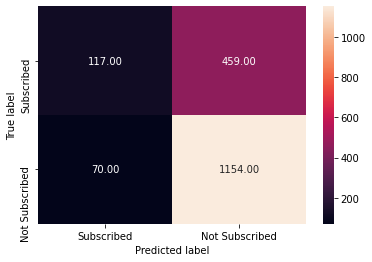

In [67]:
cm = draw_cm( test_y, pred_y )


In [68]:

#ROC AUC Score

## Predicting the probability values for test cases
predict_proba_df = pd.DataFrame( logit.predict_proba( test_X ) )
predict_proba_df.head()
cm

In [70]:
## Initializing the DataFrame with actual class lables
test_results_df = pd.DataFrame( { 'actual': test_y } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [71]:
test_results_df.head(5)

index  actual     chd_1
0   4482       0  0.227880
1    652       0  0.349941
2   1798       0  0.349615
3   1050       0  0.247361
4   4028       1  0.463841

In [72]:
# Passing actual class labels and the predicted probability values to compute ROC AUC score.
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1)
round( float( auc_score ), 2 )

0.69

In [73]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
## - ROC Auc Score
## - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

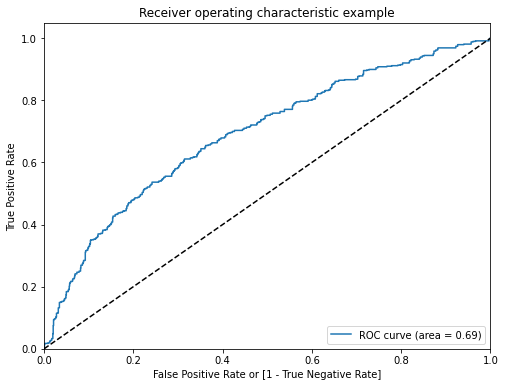

In [74]:
## Invoking draw_roc_curve with the logistic regresson model
_, _, _, _ = draw_roc_curve( logit, test_X, test_y )